This section  is dedicated to extract data from the database for the data cleaning & preprocessing, EDA, and statistical & predictive analysis.  

Data extraction. 


In [1]:
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import os

# Load .env file
load_dotenv()

# Database credentials from .env
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

# Create database connection
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Query all data for 5 banks and multiple years
query = """
SELECT s.bank_name, sp.date, sp.close_price, sp.high_price, sp.low_price, sp.open_price, sp.volume
FROM stock_prices as sp 
JOIN stocks as s ON s.ticker=sp.stock_ticker ;
"""
df = pd.read_sql(query, engine)

print(df.head())  


  bank_name        date  close_price  high_price  low_price  open_price  \
0       BMO  2020-01-03    80.279427   80.335287  79.593141   79.880423   
1       BMO  2020-01-06    80.215599   80.239544  79.856499   79.888420   
2       BMO  2020-01-07    80.079941   80.622585  80.048020   80.239546   
3       BMO  2020-01-08    80.662498   81.101398  80.199653   80.215611   
4       BMO  2020-01-09    80.957748   81.213110  80.702387   80.997651   

    volume  
0  1473000  
1  1147500  
2   702000  
3  1088400  
4  1683900  


In [2]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")


Data has 6273 rows and 7 columns


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bank_name    6273 non-null   object 
 1   date         6273 non-null   object 
 2   close_price  6273 non-null   float64
 3   high_price   6273 non-null   float64
 4   low_price    6273 non-null   float64
 5   open_price   6273 non-null   float64
 6   volume       6273 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 343.2+ KB


In [6]:
#converting data into the datetime format
df['date'] = pd.to_datetime(df['date'])
df.dtypes


bank_name              object
date           datetime64[ns]
close_price           float64
high_price            float64
low_price             float64
open_price            float64
volume                  int64
dtype: object

In [7]:
#data has no missing values
df.isnull().sum()

bank_name      0
date           0
close_price    0
high_price     0
low_price      0
open_price     0
volume         0
dtype: int64

In [11]:
# Basic statistics for numerical columns
print(df.describe())

# The distribution of stock prices
print("The distribution of stock close prices")
print(df['close_price'].describe())

                                date  close_price   high_price    low_price  \
count                           6273  6273.000000  6273.000000  6273.000000   
mean   2022-07-01 15:24:25.136298240    80.389468    80.931078    79.811136   
min              2020-01-02 00:00:00    25.911804    28.073357    25.877310   
25%              2021-04-01 00:00:00    56.463879    56.818015    56.027343   
50%              2022-06-30 00:00:00    73.648445    74.145484    73.155671   
75%              2023-10-02 00:00:00   109.846405   110.574856   109.124842   
max              2024-12-31 00:00:00   179.570007   180.449997   178.440002   
std                              NaN    30.385350    30.516353    30.213970   

        open_price        volume  
count  6273.000000  6.273000e+03  
mean     80.359042  4.175782e+06  
min      27.440987  2.157000e+05  
25%      56.456757  2.257200e+06  
50%      73.643317  3.363200e+06  
75%     109.903316  5.103700e+06  
max     179.940002  2.883860e+07  
std     

In [12]:
df.columns.tolist()

['bank_name',
 'date',
 'close_price',
 'high_price',
 'low_price',
 'open_price',
 'volume']

In [13]:
duplicate_rows_df = df[df.duplicated()]

if duplicate_rows_df.empty: 
    print("There are no duplicates")
else:
    print("Number of duplicate rows:", duplicate_rows_df.shape[0])


There are no duplicates


Univariate Analysis for (analyzing the distribution, central tendency, and spread of data effectively)

In [14]:
#detecting outliers in close_prise
Q1 = df["close_price"].quantile(0.25)
Q3 = df["close_price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["close_price"] < lower_bound) | (df["close_price"] > upper_bound)]
print(f"Number of outliers in closing price: {outliers.shape[0]}")


Number of outliers in closing price: 0


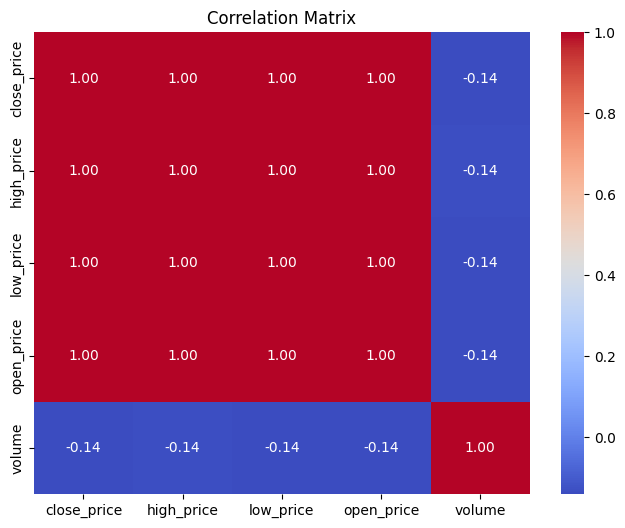

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Basic correlation heatmap for numeric columns
# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Closing Prices")
plt.show()


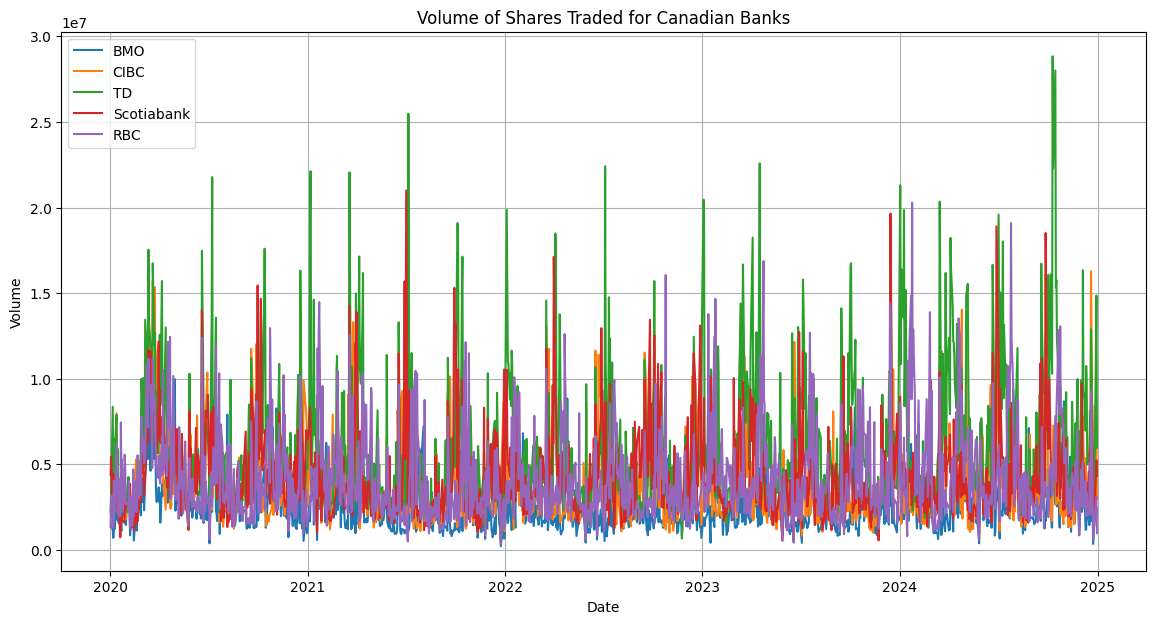

In [19]:
#Volume analysis

plt.figure(figsize=(14, 7))
for bank in df['bank_name'].unique():
    bank_data = df[df['bank_name'] == bank]
    plt.plot(bank_data['date'], bank_data['volume'], label=bank)


plt.title('Volume of Shares Traded for Canadian Banks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.

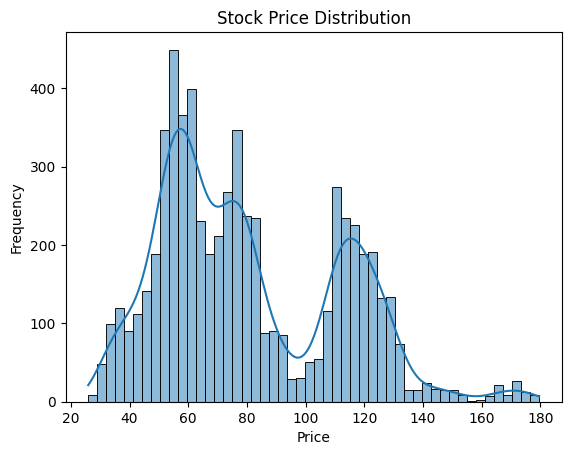

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["close_price"], kde=True, bins=50)
plt.title("Stock Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


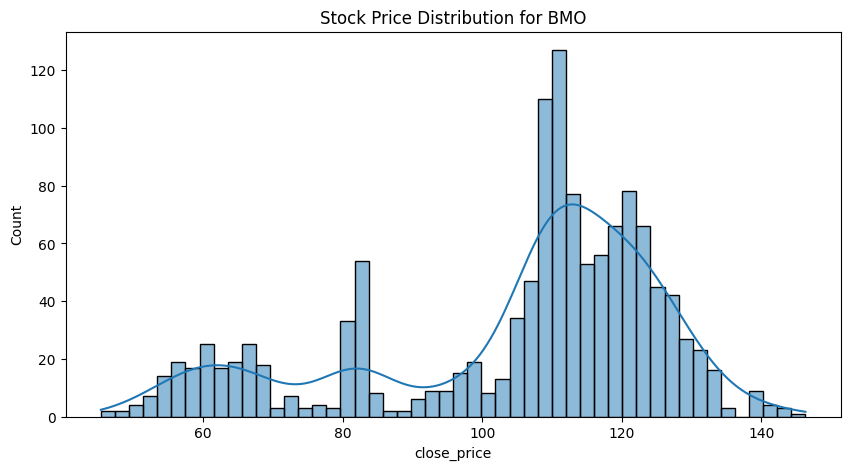

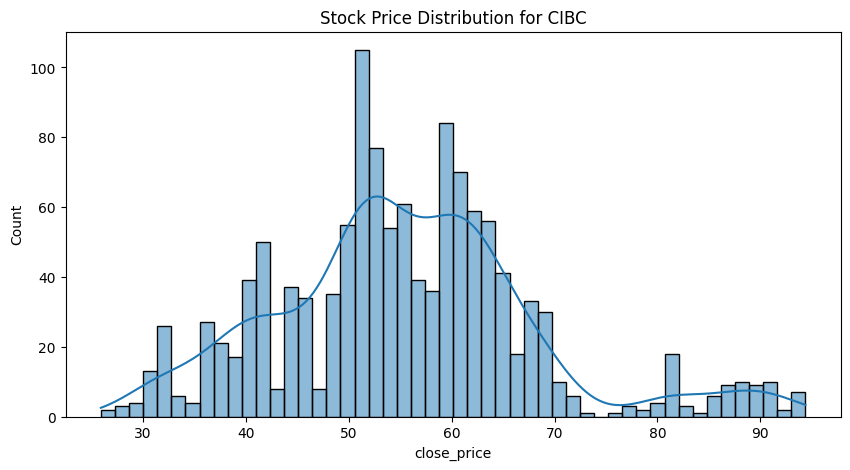

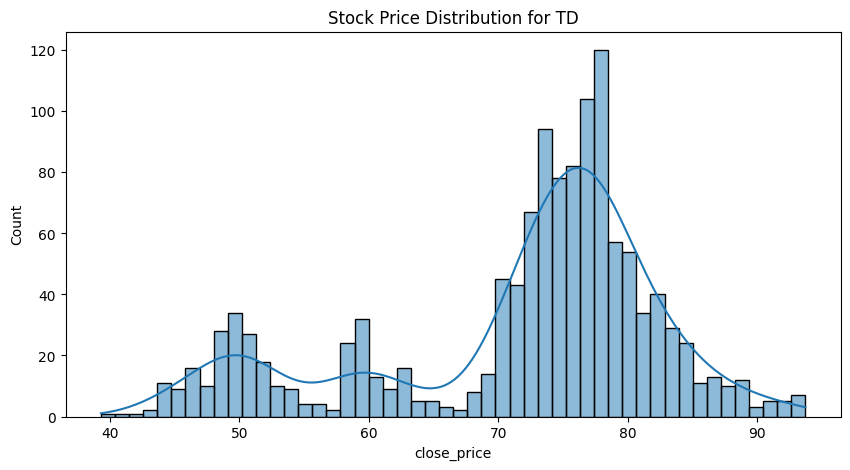

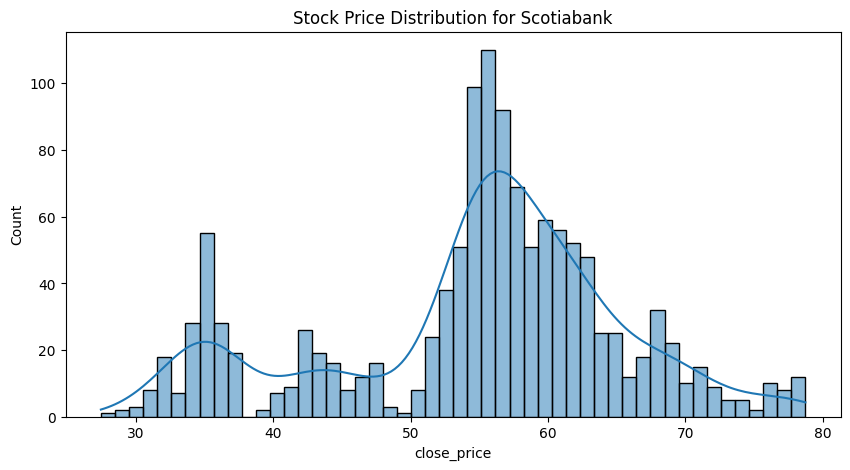

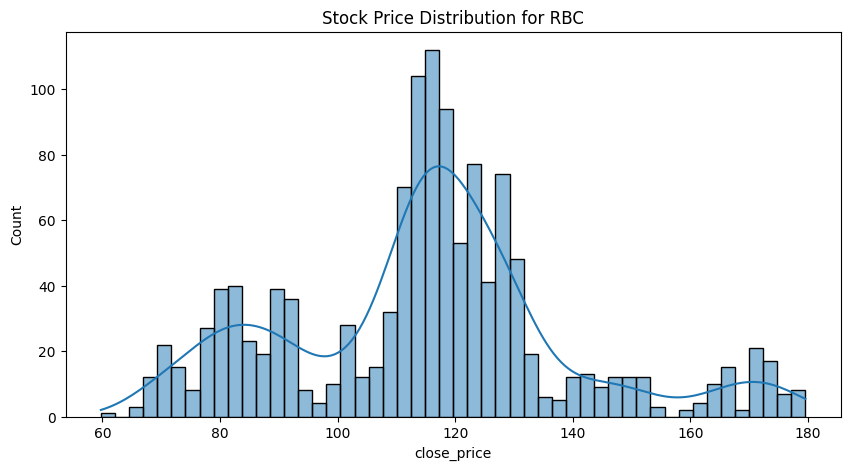

In [21]:
#for each bank separately
banks = df["bank_name"].unique()

for bank in banks:
    plt.figure(figsize=(10,5))
    sns.histplot(df[df["bank_name"] == bank]["close_price"], bins=50, kde=True)
    plt.title(f"Stock Price Distribution for {bank}")
    plt.show()


Skewness and Kurtosis check to detect if data is symetrical or has extreeme values. 
Skewness ≈ 0 → Symmetric distribution.
Positive Skewness (e.g., 0.63) → Right tail is longer, meaning some stocks had exceptionally high prices.
Kurtosis < 3 → Flatter than normal distribution, meaning fewer extreme outliers.

In [22]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for close price
skew_close_all = skew(df["close_price"], nan_policy='omit')  # Avoid issues with NaNs
kurt_close_all = kurtosis(df["close_price"], nan_policy='omit')

print("Overall skewness and kurtosis")
print("Close price Skewness:", skew_close_all)
print("Close price Kurtosis:", kurt_close_all)

# Interpretation of skewness
if -0.1 <= skew_close_all <= 0.1:
    print("The distribution is symmetric, no extreme prices or outliers.")
elif 0.5 <= skew_close_all <= 1:
    print("Moderate positive skewness, meaning there are a few extremely high close prices.")
elif -1 <= skew_close_all <= -0.5:
    print("Moderate negative skewness, meaning there are a few extremely low close prices.")
elif skew_close_all > 1:
    print("High positive skewness, meaning there are many extremely high close prices.")
elif skew_close_all < -1:
    print("High negative skewness, meaning there are many extremely low close prices.")
else:
    print("Slight skewness, but not significant.")

# Interpretation of kurtosis
if kurt_close_all < -1:
    print("Low kurtosis (platykurtic): Distribution has light tails and fewer extreme values.")
elif -1 <= kurt_close_all <= 1:
    print("Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.")
elif kurt_close_all > 1:
    print("High kurtosis (leptokurtic): Distribution has heavy tails and more extreme values.")




Overall skewness and kurtosis
Close price Skewness: 0.6303684665007772
Close price Kurtosis: -0.3649060170401919
Moderate positive skewness, meaning there are a few extremely high close prices.
Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.


In [23]:
#Skewness and kurtosis for each bank
# Group by bank and calculate skewness and kurtosis
for bank in df["bank_name"].unique():
    bank_df = df[df["bank_name"] == bank]  # Filter data for the specific bank
    
    skew_close = skew(bank_df["close_price"], nan_policy='omit')
    kurt_close = kurtosis(bank_df["close_price"], nan_policy='omit')

    print(f"\nBank: {bank}")
    print("Close price Skewness:", skew_close)
    print("Close price Kurtosis:", kurt_close)

    # Skewness interpretation
    if -0.1 <= skew_close <= 0.1:
        print("The distribution is symmetric, no extreme prices or outliers.")
    elif 0.5 <= skew_close <= 1:
        print("Moderate positive skewness, meaning there are a few extremely high close prices.")
    elif -1 <= skew_close <= -0.5:
        print("Moderate negative skewness, meaning there are a few extremely low close prices.")
    elif skew_close > 1:
        print("High positive skewness, meaning there are many extremely high close prices.")
    elif skew_close < -1:
        print("High negative skewness, meaning there are many extremely low close prices.")
    else:
        print("Slight skewness, but not significant.")

    # Kurtosis interpretation
    if kurt_close < -1:
        print("Low kurtosis (platykurtic): Distribution has light tails and fewer extreme values.")
    elif -1 <= kurt_close <= 1:
        print("Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.")
    elif kurt_close > 1:
        print("High kurtosis (leptokurtic): Distribution has heavy tails and more extreme values.")



Bank: BMO
Close price Skewness: -0.9861595049259944
Close price Kurtosis: -0.050476559071645166
Moderate negative skewness, meaning there are a few extremely low close prices.
Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.

Bank: CIBC
Close price Skewness: 0.5400604342365133
Close price Kurtosis: 0.7728147960583986
Moderate positive skewness, meaning there are a few extremely high close prices.
Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.

Bank: TD
Close price Skewness: -0.9472104022492269
Close price Kurtosis: 0.04664374644159075
Moderate negative skewness, meaning there are a few extremely low close prices.
Normal kurtosis (mesokurtic): Close price distribution is similar to a normal distribution.

Bank: Scotiabank
Close price Skewness: -0.5115911846269319
Close price Kurtosis: -0.10012507411835747
Moderate negative skewness, meaning there are a few extremely low close prices.
Normal kurtosis

Price trends over time

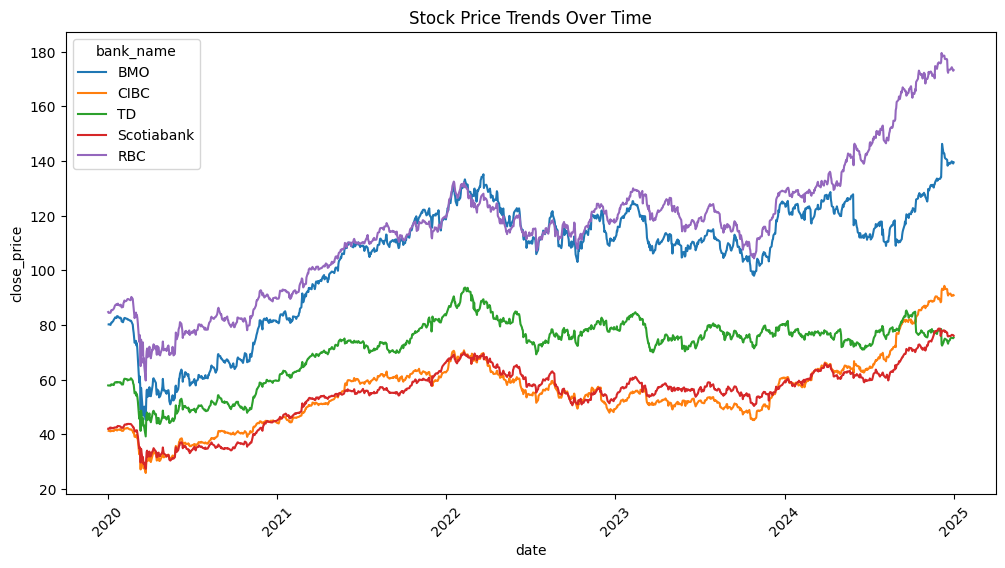

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x="date", y="close_price", hue="bank_name", data=df)
plt.title("Stock Price Trends Over Time")
plt.xticks(rotation=45)
plt.show()

Bank Comparison 

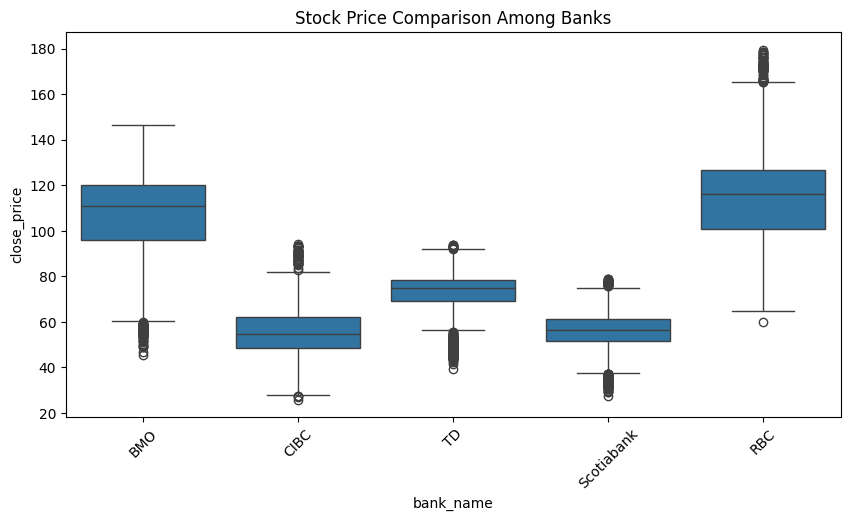

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x="bank_name", y="close_price", data=df)
plt.title("Stock Price Comparison Among Banks")
plt.xticks(rotation=45)
plt.show()

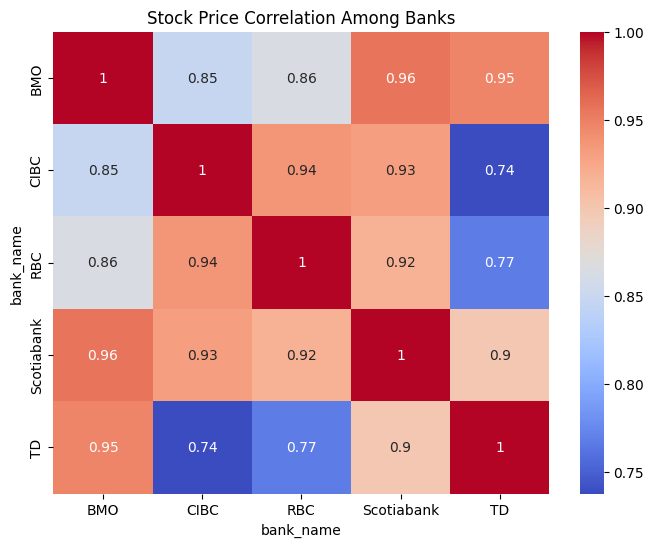

In [27]:
df_pivot = df.pivot(index="date", columns="bank_name", values="close_price")
correlation_matrix = df_pivot.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Stock Price Correlation Among Banks")
plt.show()


Moving Averages (SMA & EMA)
Moving Averages smooth out price fluctuations to help identify trends by averaging past prices over a specific period.

- SMA (Simple Moving Average) shows the general trend by averaging past prices.
- EMA (Exponential Moving Average) reacts faster to price changes and is more sensitive to recent trends

Why we use it:
Helps identify bullish/bearish trends
SMA is slower but reliable; EMA reacts faster to recent price movements

How to interpret?
 Price above SMA/EMA → Uptrend (bullish signal)
 Price below SMA/EMA → Downtrend (bearish signal)
 Golden Cross (Short-term MA crosses above Long-term MA) → Bullish
 Death Cross (Short-term MA crosses below Long-term MA) → Bearish

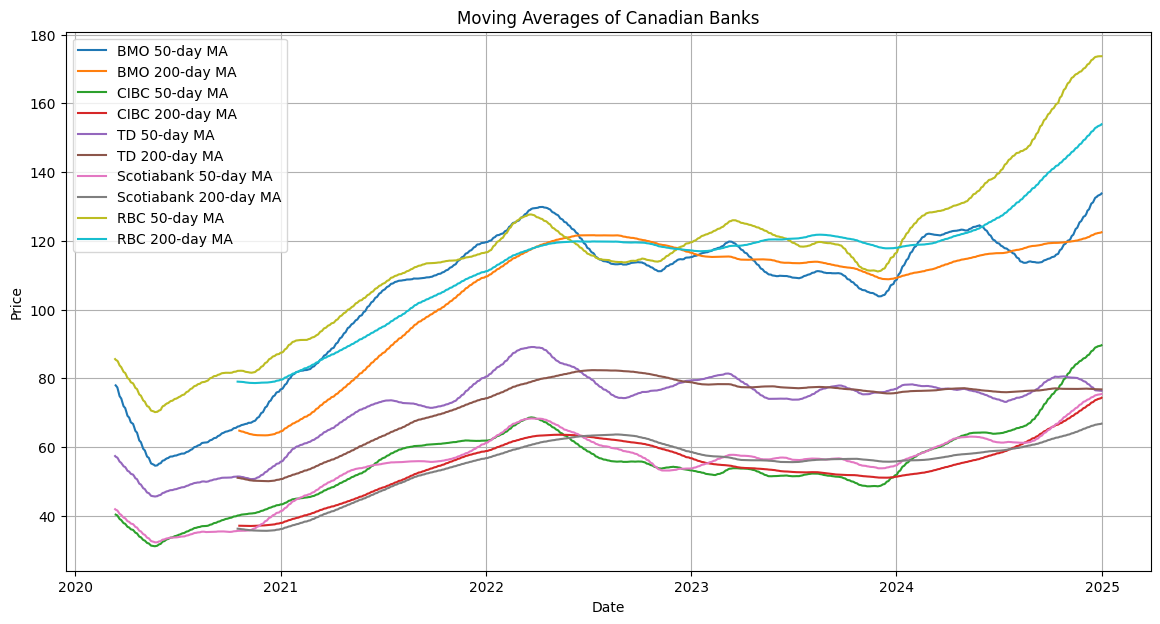

In [28]:
# Moving averages for 50-day and 200-day windows
df['50_day_MA'] = df.groupby('bank_name')['close_price'].rolling(window=50).mean().reset_index(0, drop=True)
df['200_day_MA'] = df.groupby('bank_name')['close_price'].rolling(window=200).mean().reset_index(0, drop=True)

plt.figure(figsize=(14, 7))
for bank in df['bank_name'].unique():
    bank_data = df[df['bank_name'] == bank]
    plt.plot(bank_data['date'], bank_data['50_day_MA'], label=f'{bank} 50-day MA')
    plt.plot(bank_data['date'], bank_data['200_day_MA'], label=f'{bank} 200-day MA')

plt.title('Moving Averages of Canadian Banks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Feature engineering 
- Volatility
Volatility measures how much stock prices fluctuate over time. It helps answer:
✔ How risky is a stock? Higher volatility = larger price swings = riskier investment.
✔ Is the market stable or uncertain? Low volatility = stable trend, high volatility = unpredictable.
✔ When to invest? Investors may prefer low-volatility stocks for long-term stability, but traders might seek high volatility for short-term gains.

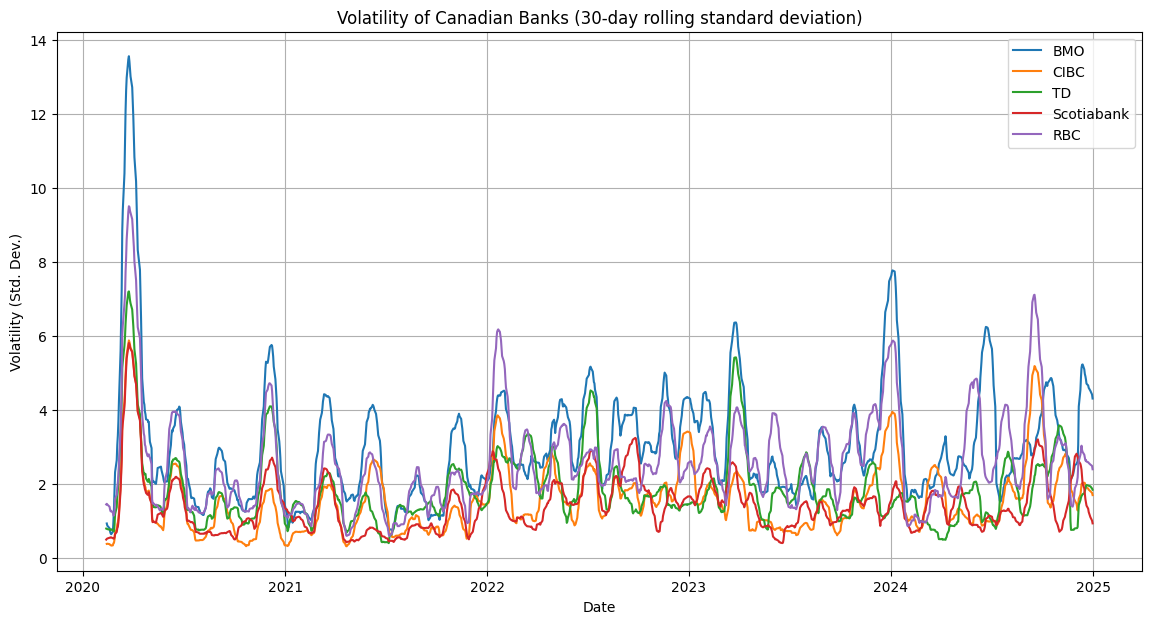

In [ ]:
# Calculate rolling standard deviation (30 days) for each bank
df['volatility'] = df.groupby('bank_name')['close_price'].rolling(window=30).std().reset_index(0, drop=True)

# Plot volatility over time for each bank
plt.figure(figsize=(14, 7))
for bank in df['bank_name'].unique():
    bank_data = df[df['bank_name'] == bank]
    plt.plot(bank_data['date'], bank_data['volatility'], label=bank)

plt.title('Volatility of Canadian Banks (30-day rolling standard deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility (Std. Dev.)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\MiF\AppData\Local\Temp\ipykernel_15960\3148685660.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bank_name", y="Volatility", data=df, palette="Set2")


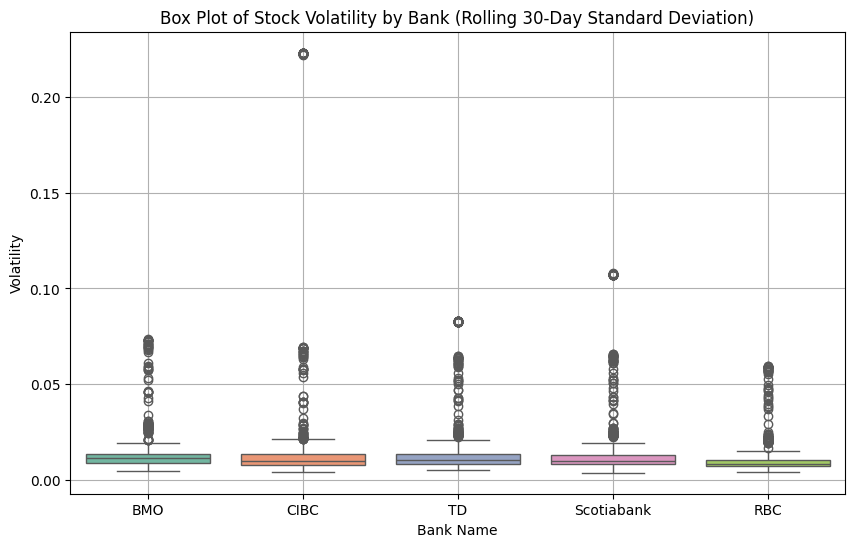

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values (rolling std introduces NaNs at the beginning)
df = df.dropna(subset=["Volatility"])

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="bank_name", y="Volatility", data=df, palette="Set2")

# Labels and title
plt.title("Box Plot of Stock Volatility by Bank (Rolling 30-Day Standard Deviation)")
plt.ylabel("Volatility")
plt.xlabel("Bank Name")
plt.grid(True)

# Show plot
plt.show()
